# Getting Started

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

import analysis

# Preliminary Test

In [3]:
# Load the summary
opt_data_test = pd.read_csv("data/summary/optimum_data_test.csv")

# Extract parameter
opt_data_test["variant_id"] = [
    var_str.split("_")[1] for var_str in opt_data_test["run_name"].values
]
opt_data_test["percent_train_data"] = [
    round(float(var_str.split("_")[2]), 2) * 80
    for var_str in opt_data_test["run_name"].values
]

opt_data_test = opt_data_test.replace([-np.inf, np.inf], [-99, 99])
opt_data_test["percent_train_data"] = opt_data_test["percent_train_data"].round(2)

opt_data_test = opt_data_test[
    [
        "datetime",
        "variant_id",
        "percent_train_data",
        "output_file",
        "rms_dev",
        "mae",
        "std_diff",
        "run_time",
    ]
]
opt_data_test

,datetime,variant_id,percent_train_data,output_file,rms_dev,mae,std_diff,run_time
0,2025-06-17 15:56,2411,4.0,data/result/2025-06-17 15:56_Variant_2411_0.05...,0.384486,-0.004615,0.384459,0:01:32.767520
1,2025-06-17 15:56,2411,9.6,data/result/2025-06-17 15:56_Variant_2411_0.12...,0.308344,0.027265,0.307136,0:02:45.254430
2,2025-06-17 15:56,2411,15.2,data/result/2025-06-17 15:56_Variant_2411_0.19...,0.277486,0.037305,0.274967,0:03:46.080720
3,2025-06-17 15:56,2411,20.0,data/result/2025-06-17 15:56_Variant_2411_0.25...,0.252714,-0.017025,0.252140,0:04:47.489287
4,2025-06-17 15:56,2411,25.6,data/result/2025-06-17 15:56_Variant_2411_0.32...,0.243412,-0.017520,0.242781,0:05:41.312116
...,...,...,...,...,...,...,...,...
1495,2025-06-18 10:43,195,58.4,data/result/2025-06-18 10:43_Variant_195_0.73/...,0.175813,0.003455,0.175779,0:09:49.181442
1496,2025-06-18 10:43,195,64.0,data/result/2025-06-18 10:43_Variant_195_0.80/...,0.189809,0.000140,0.189809,0:10:18.832976
1497,2025-06-18 10:43,195,68.8,data/result/2025-06-18 10:43_Variant_195_0.86/...,0.177340,0.001443,0.177334,0:10:45.793675
1498,2025-06-18 10:43,195,74.4,data/result/2025-06-18 10:43_Variant_195_0.93/...,0.162489,-0.006105,0.162374,0:11:01.680227


NameError: name 'plot_data' is not defined

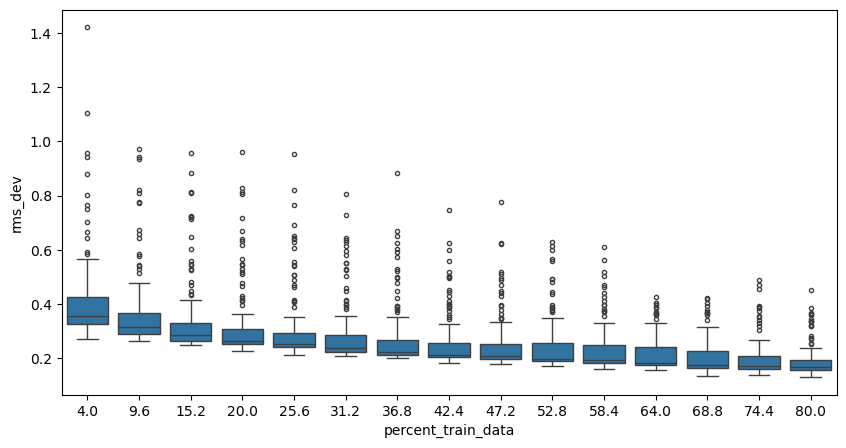

In [4]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    x="percent_train_data",
    y="rms_dev",
    data=opt_data_test,
    fliersize=3,
)

plt.ylabel(plot_data[i][1])
plt.xlabel("%Train Data")
plt.ylim(bottom=0)

/tmp/ipykernel_23089/3768936449.py:3: FutureWarning: The provided callable <function mean at 0x7f4e70531760> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  compact_df = compact_df.groupby("percent_train_data", as_index=False).agg(


4    25.6
Name: percent_train_data, dtype: float64
2    15.2
Name: percent_train_data, dtype: float64


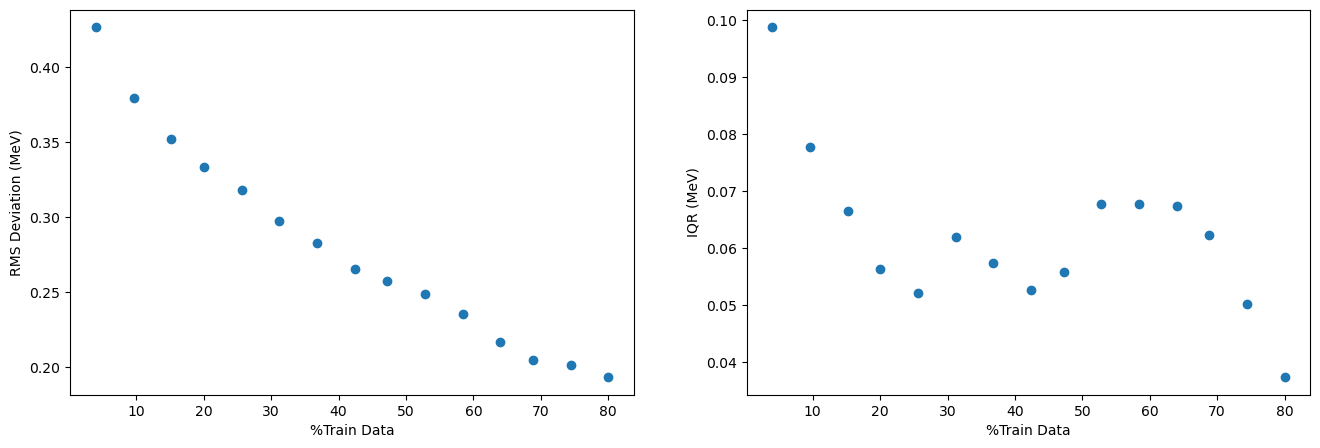

In [50]:
# Groupby
compact_df = opt_data_test[["percent_train_data", "rms_dev"]]
compact_df = compact_df.groupby("percent_train_data", as_index=False).agg(
    mean=("rms_dev", np.mean),
    iqr=("rms_dev", lambda x: x.quantile(0.75) - x.quantile(0.25)),
)

# Determine the optimum
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
ax[0].scatter(compact_df["percent_train_data"], compact_df["mean"])
ax[0].set_xlabel("%Train Data")
ax[0].set_ylabel("RMS Deviation (MeV)")

ax[1].scatter(compact_df["percent_train_data"], compact_df["iqr"])
ax[1].set_xlabel("%Train Data")
ax[1].set_ylabel("IQR (MeV)")


# IC50-like determination
def det_ic50(col):
    val_max = col.max()
    val_min = col.min()

    half_pos = (val_max - val_min) / 2 + val_min
    delta = col.apply(lambda x: x - half_pos)
    lower_than_half = delta[delta < 0]
    higher_than_half = delta[delta > 0]
    first_closest_value = [
        np.abs(lower_than_half.iloc[0]),
        np.abs(higher_than_half.iloc[-1]),
    ]

    return delta.index[delta.abs() == min(first_closest_value)]


print(compact_df.loc[det_ic50(compact_df["mean"])]["percent_train_data"])
print(compact_df.loc[det_ic50(compact_df["iqr"])]["percent_train_data"])

In [2]:
result_summary = pd.read_csv("summary.csv")
result_summary.loc[139:].head()

,datetime,run_name,run_config,loss,val_loss,rms_dev,mae,std_diff,output_file,run_time,note
139,2025-06-17 12:22,Variant_13_3,data/run/2025-06-17 12:20/config_13_3.toml,data/result/2025-06-17 12:22_Variant_13_3/loss...,data/result/2025-06-17 12:22_Variant_13_3/val_...,0.268953,-0.003871,0.268925,data/result/2025-06-17 12:22_Variant_13_3/resu...,0:02:16.944426,NaN
140,2025-06-17 12:22,Variant_13_4,data/run/2025-06-17 12:20/config_13_4.toml,data/result/2025-06-17 12:22_Variant_13_4/loss...,data/result/2025-06-17 12:22_Variant_13_4/val_...,0.273671,0.000785,0.273670,data/result/2025-06-17 12:22_Variant_13_4/resu...,0:02:17.307405,NaN
141,2025-06-17 12:22,Variant_1420_4,data/run/2025-06-17 12:20/config_1420_4.toml,data/result/2025-06-17 12:22_Variant_1420_4/lo...,data/result/2025-06-17 12:22_Variant_1420_4/va...,0.436356,0.012894,0.436166,data/result/2025-06-17 12:22_Variant_1420_4/re...,0:02:17.384209,NaN
142,2025-06-17 12:22,Variant_1_2,data/run/2025-06-17 12:20/config_1_2.toml,data/result/2025-06-17 12:22_Variant_1_2/loss.dat,data/result/2025-06-17 12:22_Variant_1_2/val_l...,0.304395,0.013273,0.304106,data/result/2025-06-17 12:22_Variant_1_2/resul...,0:02:17.445731,NaN
143,2025-06-17 12:22,Variant_1420_0,data/run/2025-06-17 12:20/config_1420_0.toml,data/result/2025-06-17 12:22_Variant_1420_0/lo...,data/result/2025-06-17 12:22_Variant_1420_0/va...,0.444178,0.014118,0.443954,data/result/2025-06-17 12:22_Variant_1420_0/re...,0:02:17.642049,NaN


0.2861123196822926


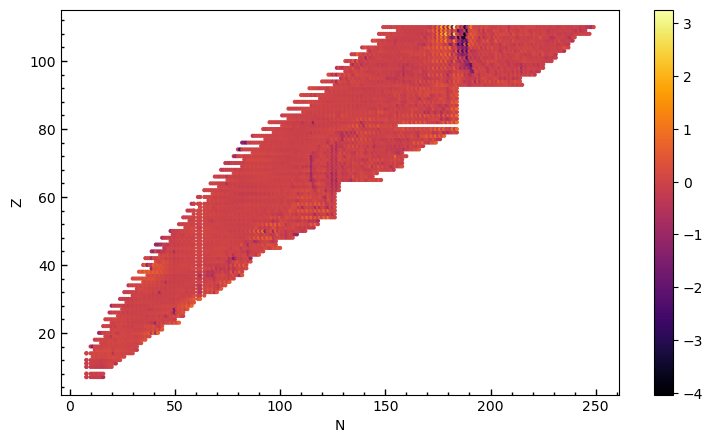

In [4]:
tested_df = result_summary.iloc[-1, :]
tested_mt = pd.read_csv(tested_df["output_file"])
print(np.sqrt((tested_mt["difference"] ** 2).mean()))
analysis.plot.nuclear_landscape(tested_mt["N"], tested_mt["Z"], tested_mt["difference"])

In [13]:
test_stability_df = result_summary.loc[139:]
pd.concat([test_stability_df.head(3), test_stability_df.tail(3)])

,datetime,run_name,run_config,loss,val_loss,rms_dev,mae,std_diff,output_file,run_time,note
139,2025-06-17 12:22,Variant_13_3,data/run/2025-06-17 12:20/config_13_3.toml,data/result/2025-06-17 12:22_Variant_13_3/loss...,data/result/2025-06-17 12:22_Variant_13_3/val_...,0.268953,-0.003871,0.268925,data/result/2025-06-17 12:22_Variant_13_3/resu...,0:02:16.944426,NaN
140,2025-06-17 12:22,Variant_13_4,data/run/2025-06-17 12:20/config_13_4.toml,data/result/2025-06-17 12:22_Variant_13_4/loss...,data/result/2025-06-17 12:22_Variant_13_4/val_...,0.273671,0.000785,0.273670,data/result/2025-06-17 12:22_Variant_13_4/resu...,0:02:17.307405,NaN
141,2025-06-17 12:22,Variant_1420_4,data/run/2025-06-17 12:20/config_1420_4.toml,data/result/2025-06-17 12:22_Variant_1420_4/lo...,data/result/2025-06-17 12:22_Variant_1420_4/va...,0.436356,0.012894,0.436166,data/result/2025-06-17 12:22_Variant_1420_4/re...,0:02:17.384209,NaN
181,2025-06-17 12:27,Variant_1420_3,data/run/2025-06-17 12:20/config_1420_3.toml,data/result/2025-06-17 12:27_Variant_1420_3/lo...,data/result/2025-06-17 12:27_Variant_1420_3/va...,0.459323,0.032555,0.458168,data/result/2025-06-17 12:27_Variant_1420_3/re...,0:02:25.572783,NaN
182,2025-06-17 12:27,Variant_13_3,data/run/2025-06-17 12:20/config_13_3.toml,data/result/2025-06-17 12:27_Variant_13_3/loss...,data/result/2025-06-17 12:27_Variant_13_3/val_...,0.285144,-0.057462,0.279295,data/result/2025-06-17 12:27_Variant_13_3/resu...,0:02:25.711673,NaN
183,2025-06-17 12:27,Variant_13_1,data/run/2025-06-17 12:20/config_13_1.toml,data/result/2025-06-17 12:27_Variant_13_1/loss...,data/result/2025-06-17 12:27_Variant_13_1/val_...,0.286112,-0.048863,0.281909,data/result/2025-06-17 12:27_Variant_13_1/resu...,0:02:25.823303,NaN


(array([2., 0., 3., 3., 0., 0., 2., 2., 2., 1.]),
 array([0.30143191, 0.30473722, 0.30804253, 0.31134784, 0.31465315,
        0.31795846, 0.32126377, 0.32456908, 0.32787439, 0.3311797 ,
        0.33448501]),
 <BarContainer object of 10 artists>)

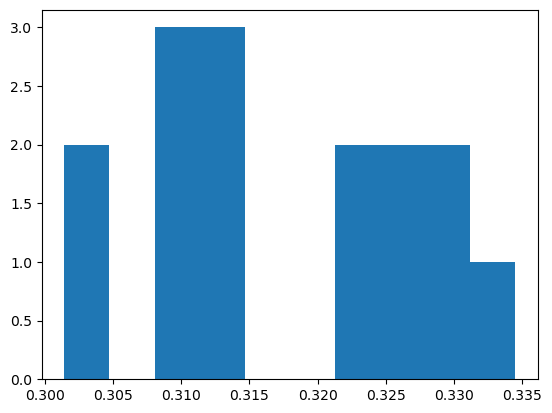

In [21]:
test_stability = {}
for variant in [1, 13, 1420]:
    v_test = test_stability_df[
        test_stability_df["run_name"].str.startswith(f"Variant_{variant}_")
    ]
    rms_dev = v_test["rms_dev"]
    std_diff = v_test["std_diff"]
    test_stability[str(variant)] = {"rms_dev": rms_dev, "std_diff": v_test["std_diff"]}

plt.hist(test_stability["1"]["rms_dev"])

/tmp/ipykernel_6307/599972420.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variants_df["note"] = variants_df["note"].astype(float)
/tmp/ipykernel_6307/599972420.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variants_df["variant_id"] = variant_id
/tmp/ipykernel_6307/599972420.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

,datetime,run_name,run_config,loss,val_loss,rms_dev,mae,std_diff,output_file,run_time,note,variant_id,nod
109,2025-06-14 12:56,Variant:1420_Dataset:24.0%,data/run/2025-06-14 12:52/config_1420_0.3.toml,data/result/2025-06-14 12:56_Variant:1420_Data...,data/result/2025-06-14 12:56_Variant:1420_Data...,0.421007,0.011913,0.420838,data/result/2025-06-14 12:56_Variant:1420_Data...,0:04:34.106080,1920.0,1420,24.0%
110,2025-06-14 13:01,Variant:1420_Dataset:48.0%,data/run/2025-06-14 12:52/config_1420_0.6.toml,data/result/2025-06-14 13:01_Variant:1420_Data...,data/result/2025-06-14 13:01_Variant:1420_Data...,0.366073,0.002381,0.366065,data/result/2025-06-14 13:01_Variant:1420_Data...,0:07:09.662293,3840.0,1420,48.0%
111,2025-06-14 13:08,Variant:1420_Dataset:64.0%,data/run/2025-06-14 12:52/config_1420_0.8.toml,data/result/2025-06-14 13:08_Variant:1420_Data...,data/result/2025-06-14 13:08_Variant:1420_Data...,0.379817,0.006227,0.379766,data/result/2025-06-14 13:08_Variant:1420_Data...,0:20:21.832247,5120.0,1420,64.0%
112,2025-06-14 13:28,Variant:1420_Dataset:80.0%,data/run/2025-06-14 12:52/config_1420_1.0.toml,data/result/2025-06-14 13:28_Variant:1420_Data...,data/result/2025-06-14 13:28_Variant:1420_Data...,0.346416,0.000955,0.346415,data/result/2025-06-14 13:28_Variant:1420_Data...,0:12:05.886105,6400.0,1420,80.0%
113,2025-06-14 13:40,Variant:3123_Dataset:24.0%,data/run/2025-06-14 12:52/config_3123_0.3.toml,data/result/2025-06-14 13:40_Variant:3123_Data...,data/result/2025-06-14 13:40_Variant:3123_Data...,0.227248,0.001766,0.227241,data/result/2025-06-14 13:40_Variant:3123_Data...,0:05:01.182754,1920.0,3123,24.0%


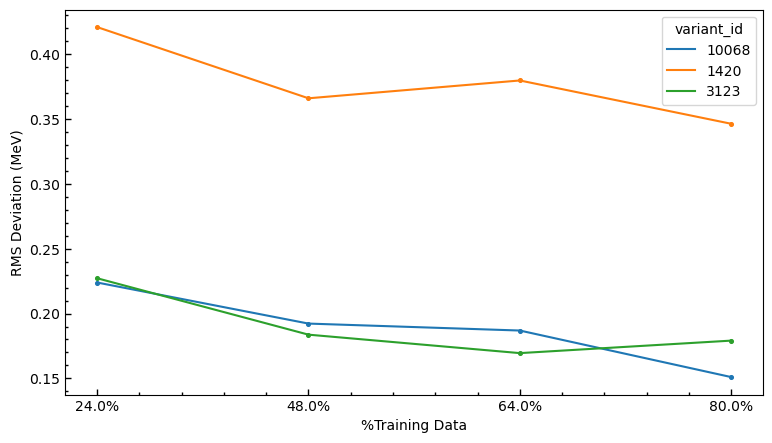

In [4]:
variants_df = result_summary.iloc[109:121]
# variants_df = pd.concat([result_summary.iloc[33:43], variants_df])
# variants_df.loc[variants_df.index[:10], "run_name"] = "Variant:3123,Data"
variants_df["note"] = variants_df["note"].astype(float)
variants_df.loc[variants_df.index[:10], "note"] *= 80

variant_id = [
    var_str.split("_")[0].split(":")[1] for var_str in variants_df["run_name"].values
]
nod = [
    var_str.split("_")[1].split(":")[1] for var_str in variants_df["run_name"].values
]
variants_df["variant_id"] = variant_id
variants_df["nod"] = nod


fig, ax = plt.subplots(figsize=(9, 5))
for label, group in variants_df.groupby("variant_id"):
    ax.plot(group["nod"], group["rms_dev"], label=label)
    ax.scatter(group["nod"], group["rms_dev"], s=7)
    analysis.plot.set_tick(ax)

ax.set_xlabel("%Training Data")
ax.set_ylabel("RMS Deviation (MeV)")
ax.legend(title="variant_id")
variants_df.head()

Text(0, 0.5, 'Frequency')

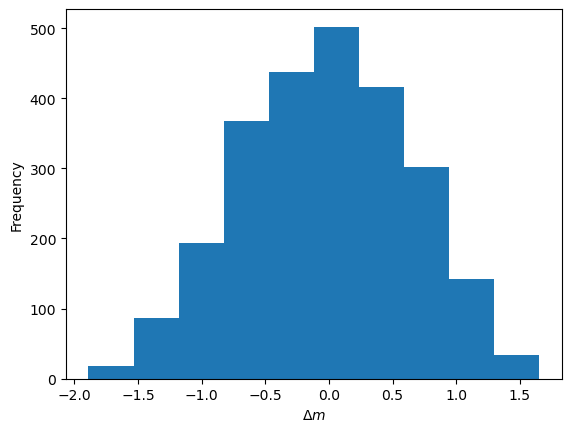

In [26]:
# Analyse the mae of all BSk24 Variants
from input.load import load_df
from input.feature import relative_mass

_, mt = load_df("variant", "ext_sample")
mt = relative_mass(mt)

mt = mt.groupby(by=["varian_id"], as_index=False).mean()
mt = mt[["varian_id", "m"]]

plt.hist(mt["m"])
plt.xlabel(r"$\Delta m$")
plt.ylabel("Frequency")

In [55]:
border = [(-2, -1), (-1, -0.3), (-0.3, 0.3), (0.3, 1), (1, 2)]
variants = []
for i in border:
    bdf = mt[(mt["m"] > i[0]) & (mt["m"] < i[1])].sample(n=20)
    v = bdf["varian_id"].values
    variants.append(v)

variants = np.concatenate(variants).tolist()
with open("variants_test.txt", "w") as file:
    for variant_item in variants:
        file.write(str(variant_item) + "\n")

# Preliminary analysis

In [4]:
result = pd.read_csv("summa.csv")
result

,datetime,run_name,run_config,loss,val_loss,rms_dev,mae,std_diff,output_file,run_time,note
0,2025-06-17 15:30,Variant_36_0.1,data/run/2025-06-17 15:20/variant:36_p:0.1.toml,data/result/2025-06-17 15:30_Variant_36_0.1/lo...,data/result/2025-06-17 15:30_Variant_36_0.1/va...,0.271794,-0.007116,0.271701,data/result/2025-06-17 15:30_Variant_36_0.1/re...,0:00:08.712244,NaN
1,2025-06-17 15:30,Variant_36_0.2,data/run/2025-06-17 15:20/variant:36_p:0.2.toml,data/result/2025-06-17 15:30_Variant_36_0.2/lo...,data/result/2025-06-17 15:30_Variant_36_0.2/va...,0.263474,-0.012265,0.263188,data/result/2025-06-17 15:30_Variant_36_0.2/re...,0:00:08.937543,NaN
2,2025-06-17 15:30,Variant_36_0.30000000000000004,data/run/2025-06-17 15:20/variant:36_p:0.30000...,data/result/2025-06-17 15:30_Variant_36_0.3000...,data/result/2025-06-17 15:30_Variant_36_0.3000...,0.260025,0.010614,0.259809,data/result/2025-06-17 15:30_Variant_36_0.3000...,0:00:08.966808,NaN
3,2025-06-17 15:30,Variant_36_0.4,data/run/2025-06-17 15:20/variant:36_p:0.4.toml,data/result/2025-06-17 15:30_Variant_36_0.4/lo...,data/result/2025-06-17 15:30_Variant_36_0.4/va...,0.257267,0.001876,0.257260,data/result/2025-06-17 15:30_Variant_36_0.4/re...,0:00:09.142890,NaN
4,2025-06-17 15:30,Variant_36_0.5,data/run/2025-06-17 15:20/variant:36_p:0.5.toml,data/result/2025-06-17 15:30_Variant_36_0.5/lo...,data/result/2025-06-17 15:30_Variant_36_0.5/va...,0.255668,0.002531,0.255655,data/result/2025-06-17 15:30_Variant_36_0.5/re...,0:00:09.158198,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1005,2025-06-17 15:49,Variant_195_0.5,data/run/2025-06-17 15:20/variant:195_p:0.5.toml,data/result/2025-06-17 15:49_Variant_195_0.5/l...,data/result/2025-06-17 15:49_Variant_195_0.5/v...,0.304913,-0.024073,0.303961,data/result/2025-06-17 15:49_Variant_195_0.5/r...,0:00:09.727073,NaN
1006,2025-06-17 15:49,Variant_195_0.8,data/run/2025-06-17 15:20/variant:195_p:0.8.toml,data/result/2025-06-17 15:49_Variant_195_0.8/l...,data/result/2025-06-17 15:49_Variant_195_0.8/v...,0.285477,0.010085,0.285299,data/result/2025-06-17 15:49_Variant_195_0.8/r...,0:00:09.741009,NaN
1007,2025-06-17 15:49,Variant_195_0.9,data/run/2025-06-17 15:20/variant:195_p:0.9.toml,data/result/2025-06-17 15:49_Variant_195_0.9/l...,data/result/2025-06-17 15:49_Variant_195_0.9/v...,0.289726,0.010532,0.289534,data/result/2025-06-17 15:49_Variant_195_0.9/r...,0:00:09.828472,NaN
1008,2025-06-17 15:49,Variant_195_0.7000000000000001,data/run/2025-06-17 15:20/variant:195_p:0.7000...,data/result/2025-06-17 15:49_Variant_195_0.700...,data/result/2025-06-17 15:49_Variant_195_0.700...,0.291688,-0.003394,0.291668,data/result/2025-06-17 15:49_Variant_195_0.700...,0:00:09.836755,NaN


In [11]:
usda = np.gradient(rrr["rms_dev"], rrr["percent_train_data"])
(usda.max() - usda.min()) / 2

np.float64(0.0008468115836357693)

In [83]:
iiii = 116
print(result_summary.loc[iiii]["run_name"])
ppp = pd.read_csv(result_summary.loc[iiii]["output_file"])
ppp

Variant:3123_Dataset:80.0%


,Z,N,target,prediction,difference
0,7,8,0.061221,0.077404,-0.016183
1,7,8,0.058922,0.080653,-0.021731
2,7,10,0.018459,0.043021,-0.024562
3,7,11,0.063544,0.070688,-0.007144
4,7,12,-0.006687,0.015512,-0.022199
...,...,...,...,...,...
6385,110,245,-2.578800,-2.589855,0.011055
6386,110,246,-3.186500,-2.904743,-0.281757
6387,110,247,-2.814100,-2.669915,-0.144185
6388,110,248,-3.585100,-2.987860,-0.597240


In [84]:
np.sqrt((ppp["difference"] ** 2).mean()) * 100 / np.sqrt((ppp["target"] ** 2).mean())

np.float64(19.527123247376306)